<a href="https://colab.research.google.com/github/Franzanselmo12/dmc_machine-learning/blob/main/unsupervised_models/Kmeans_dbscan/Lab_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Mall Customer Segmentation
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Mall Customer Segmentation Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">Exploración de Data</a>  
5. <a href="#item34">Data Visualization</a>  
7. <a href="#item34">Clustering usando K-Means</a>  
6. <a href="#item34">Selection de Clusters</a>  
8. <a href="#item34">Gráfico de Clusters</a>  
9. <a href="#item34">3D Clusters</a>
10. <a href="#item34">DBSCAN</a>

---
</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de clustering.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de clustering.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Evaluar un modelo </h5>    

---

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:
# Imports comunes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

# Ignore las advertencias poco útiles
import warnings
import os
warnings.filterwarnings("ignore")


## Mall Customer Segmentation

Tiene un centro comercial de supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.
La puntuación de gasto es algo que le asigna al cliente en función de sus parámetros definidos, como el comportamiento del cliente y los datos de compra.

**Planteamiento del problema**

Usted es el propietario del centro comercial y desea comprender a los clientes, como quiénes pueden converger fácilmente [Clientes objetivo] para que el equipo de marketing tenga sentido y planifique la estrategia en consecuencia.

<img src="https://pbs.twimg.com/media/Enn_gEuXYAEfPz-.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cuáles son los perfiles de los clientes?</div>


**Descripción de datos**

El dataframe tiene 200 filas y 5 columnas.


---

Este archivo contiene la información básica (ID, edad, sexo, ingresos, puntaje de gasto) sobre los clientes

**CustomerID:** ID único asignado al cliente

**Gender** : Género del cliente

**Age** : Edad del cliente

**Annual Income (k$)** : Renta anual del cliente

**Spending Score (1-100)** : Puntuación asignada por el centro comercial según el comportamiento del cliente y la naturaleza del gasto




---





<strong>Puede consultar este [link](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) para leer más sobre la fuente de datos.</strong>

## Descargar y limpiar Dataset


In [2]:
# Cargar Data
pddf = pd.read_csv('Mall_Customers.csv')
pddf.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
pddf.shape

(200, 5)

In [4]:
pddf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
pddf.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Exploración de data


**Distribución de variables**

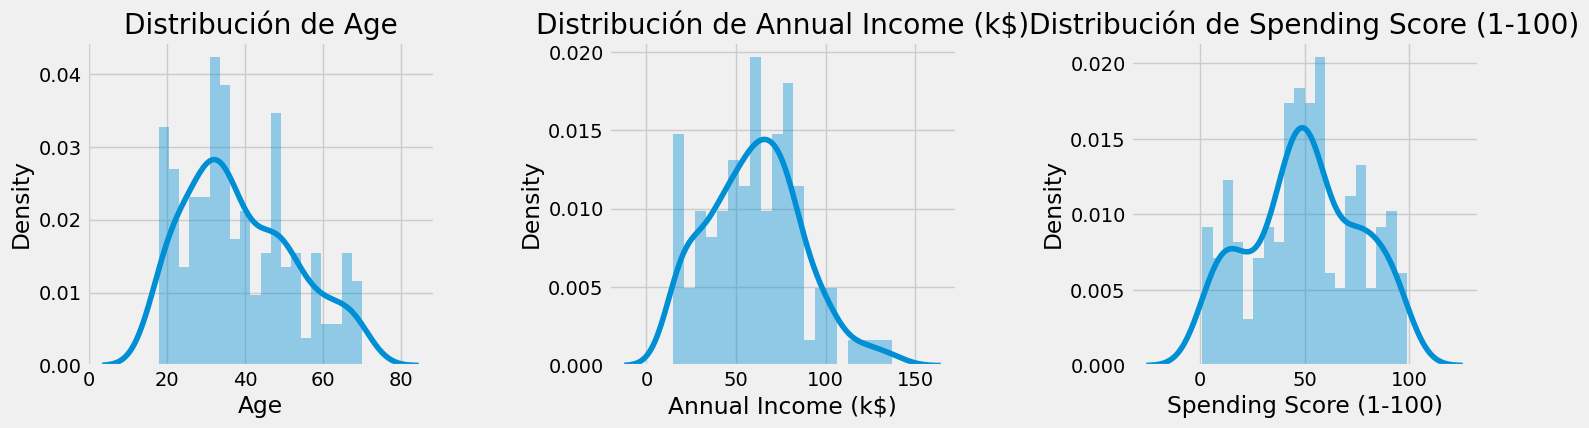

In [6]:
# Análisis Univariado / Diagrama de densidad

plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (16, 4))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5, wspace = 0.5)
    sns.distplot(pddf[x] , bins = 20)
    plt.title('Distribución de {}'.format(x))
plt.show()

In [ ]:
# Análisis Univariado / Diagrama de barras
sns.countplot(y = 'Genre' , data = pddf)
plt.show()

**Gráficos de scatterplot**

Nos permitiran analizar patrones y relaciones entre datos


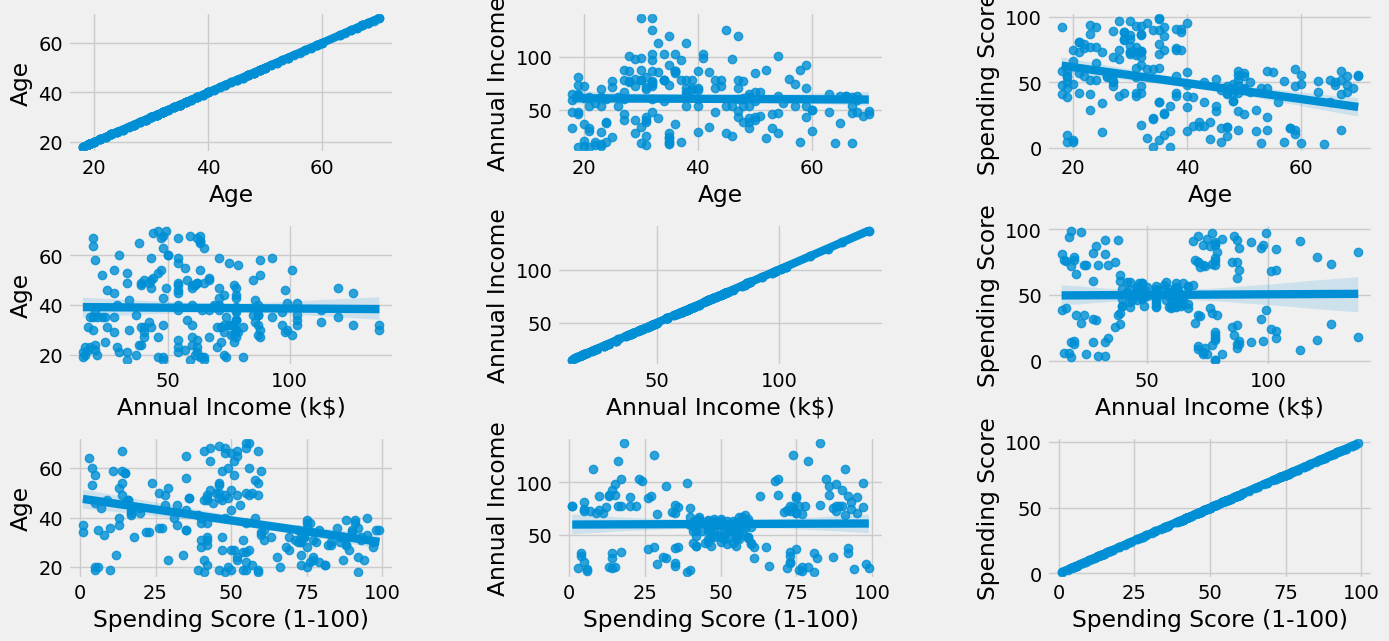

In [7]:
# Análisis Bivariado / Diagrama de dispersión

plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = pddf)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

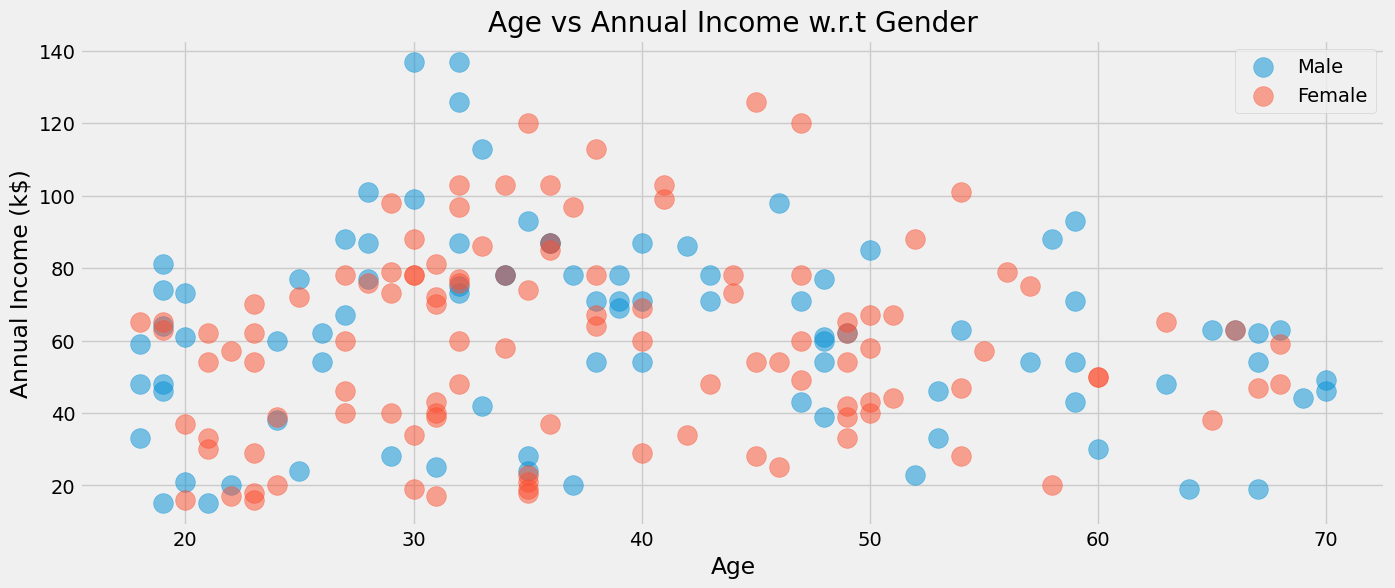

In [8]:
# Análisis Multivariado / Diagrama de dispersión

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = pddf[pddf['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

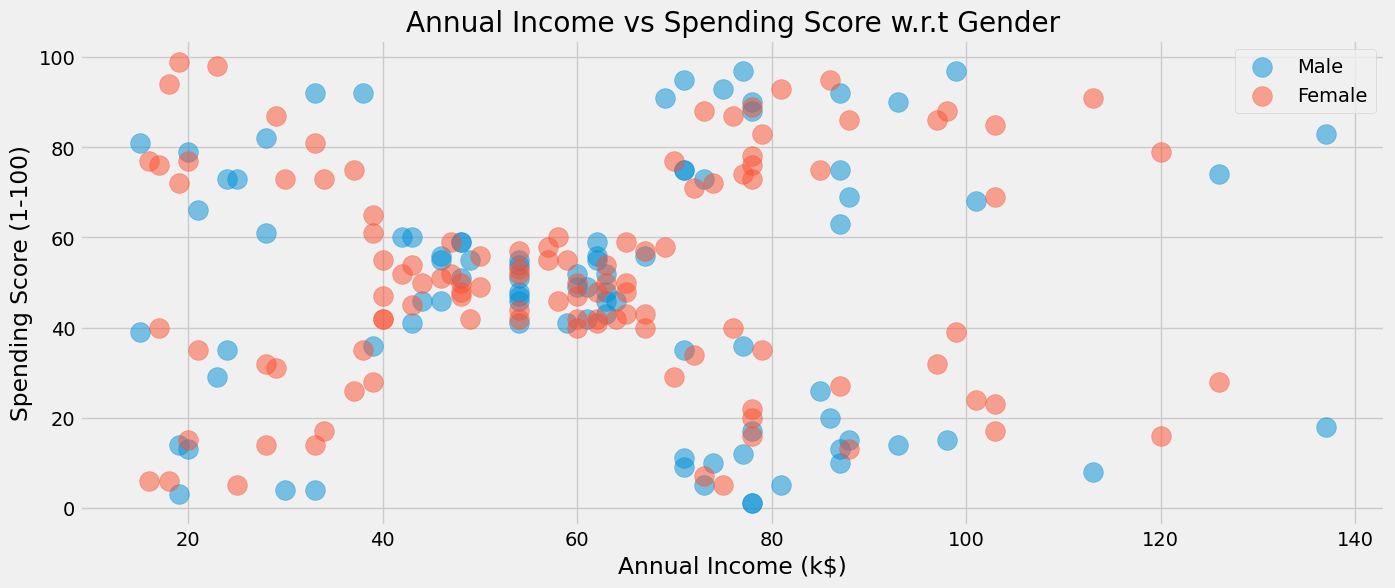

In [9]:
# Análisis Multivariado / Diagrama de dispersión

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = pddf[pddf['Genre'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

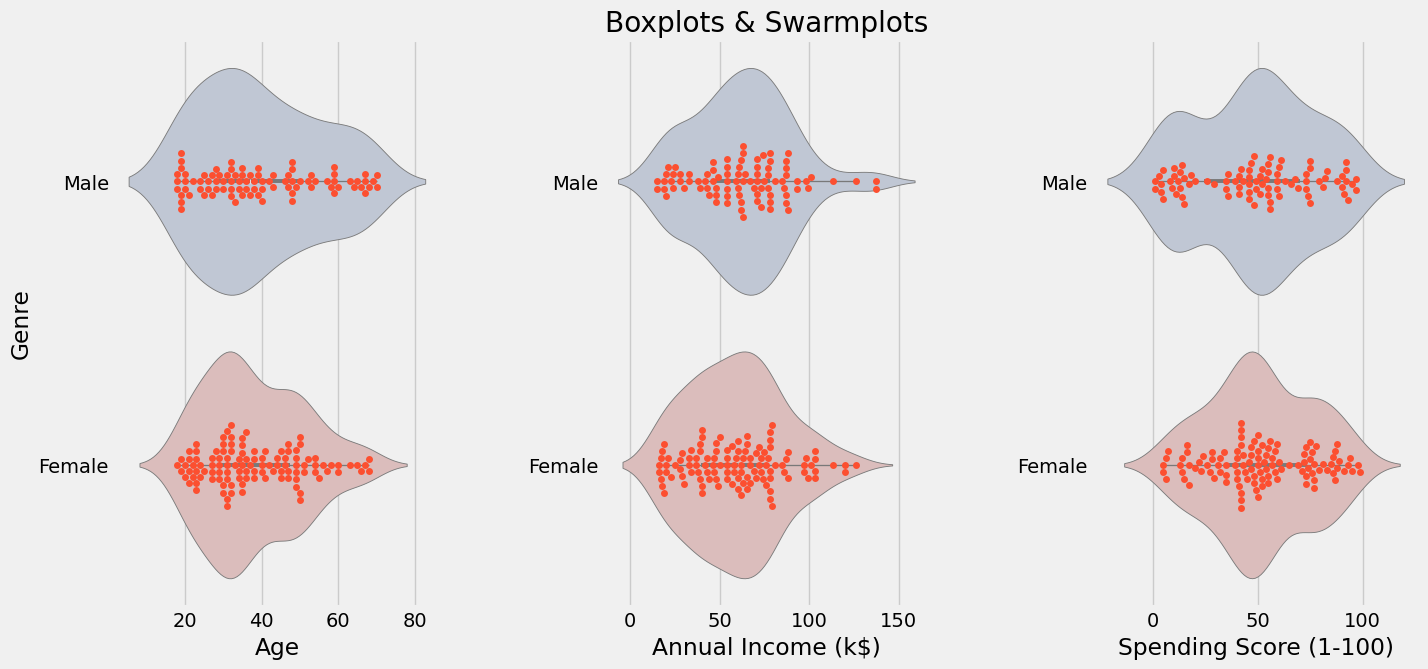

In [10]:
# Análisis Multivariado / Diagrama de Cajas

plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Genre' , data = pddf , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Genre' , data = pddf)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering con K- means



Los pasos previos antes de construir la técnica serán:




1.   Selección de Train/test
2.   Imputación de missings
3.   Tratamiento de outliers
4.   Tratamiento de variables categóricas
5.   Estandarización de datos





### Tratamiento de outliers

In [ ]:
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
# Calculando los intervalos RIC
univariate_II = pddf[numeric_features].describe().transpose()
univariate_II[['missing_rate']] = 1 - univariate_II[['count']]/pddf.shape[0]
univariate_II.sort_values(by = 'missing_rate', ascending = False, inplace = True)

univariate_II.reset_index(inplace = True)
univariate_II.rename(columns = {'index' : 'feature',
                                '25%' : 'Q1',
                                '50%' : 'median',
                                '75%' : 'Q3'}, inplace = True)

univariate_II['ric']     = univariate_II['Q3'] - univariate_II['Q1']
univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head()



In [ ]:
# Tratamiento de outliers por RIC

for col in numeric_features:
  desc = univariate_II.loc[univariate_II.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]

  pddf[col + '_tric'] = pddf[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

pddf.head()

### Tratamiento de variables categóricas

In [ ]:
pddf['Dummy_female'] = pddf.Genre.apply(lambda x: 1 if x == 'Female' else 0)


In [ ]:
pddf[['Genre', 'Dummy_female']].drop_duplicates()

### Estandarización de datos

In [ ]:
numeric_features = ['Age_tric', 'Annual Income (k$)_tric', 'Spending Score (1-100)_tric', 'Dummy_female']

In [ ]:
pddf[numeric_features].head()

In [ ]:

pddf[numeric_features] = (pddf[numeric_features] - pddf[numeric_features].mean())/pddf[numeric_features].std()


In [ ]:
pddf[numeric_features].head()

# K-Means

**Segmentación completa**

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
# Probando diferentes tamaños para k (número de clusters)

X1 = pddf[numeric_features].iloc[: , :].values

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,
                        init = 'k-means++',
                        n_init = 10,
                        max_iter=300,
                        tol = 0.0001,
                        random_state= 123 ,
                        algorithm='elkan') )

    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)


**Indicador de Inercia**

El índice de inercia mide que tan bien esta definido un clustering, a menor sea el valor mejor para nuestros resultados. Esta sujeto a la escala de nuestros datos.



<img src="https://miro.medium.com/v2/resize:fit:822/1*5yf86FgujYyctqkku2M-Kg.png" alt="HTML5 Icon" width= 200 height=150>



In [ ]:
inertia

In [ ]:
# Gráfico de codo

plt.figure(1 , figsize = (8 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
numeric_features = ['Age_tric', 'Annual Income (k$)_tric', 'Spending Score (1-100)_tric']

In [ ]:
X1 = pddf[numeric_features].iloc[: , :].values

In [ ]:
# Modelo de clustering final

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 , max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
pddf['cluster_pred'] = algorithm.predict(pddf[numeric_features])

In [ ]:
pddf.head()

In [ ]:
plt.figure(1 , figsize = (12 , 5) )
plt.scatter( x = 'Age_tric' ,y = 'Spending Score (1-100)_tric' , data = pddf , c = pddf.cluster_pred ,  s = 200 )

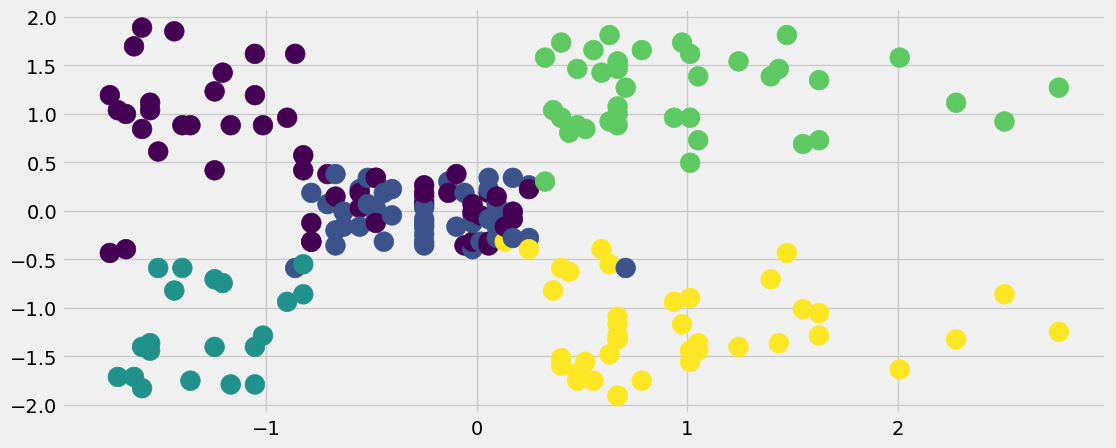

In [ ]:
plt.figure(1 , figsize = (12 , 5) )
plt.scatter( x = 'Annual Income (k$)_tric' ,y = 'Spending Score (1-100)_tric' , data = pddf , c = pddf.cluster_pred ,  s = 200 )

In [ ]:
# Configuración de scatterplot k-means
X1_1 = pddf[['Annual Income (k$)_tric', 'Spending Score (1-100)_tric']].iloc[: , :].values

h = 0.02
x_min, x_max = X1_1[:, 0].min() - 1, X1_1[:, 0].max() + 1
y_min, y_max = X1_1[:, 1].min() - 1, X1_1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(algorithm.predict(pddf[numeric_features]) )

In [ ]:
# Scatterplot k-means

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = pddf , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

**Segmentation con Annual Income y Spending Score**


In [ ]:
# Probando diferentes tamaños para k (número de clusters)

'''Annual Income y spending Score'''
X2 = pddf[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

In [ ]:
# Gráfico de codo

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Modelo de clustering final

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
# Configuración de scatterplot k-means

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# Scatterplot k-means

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = pddf , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

**Segmentation con Age , Annual Income y Spending Score**

In [ ]:
# Probando diferentes tamaños para k (número de clusters)

X3 = pddf[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [ ]:
# Gráfico de codo

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Modelo de clustering final

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
# Configuración de scatterplot 3d k-means

pddf['label3'] =  labels3
trace1 = go.Scatter3d(
    x= pddf['Age'],
    y= pddf['Spending Score (1-100)'],
    z= pddf['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = pddf['label3'],
        size= 20,
        line=dict(
            color= pddf['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

**Análisis de componentes principales**

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #
principalComponents = pca.fit_transform(X1)

In [ ]:
pddf[['component1', 'component2']] = principalComponents

In [ ]:
pca.explained_variance_ratio_

array([0.33689987, 0.26189538])

In [ ]:
# Configuración de scatterplot k-means

h = 0.02
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(X1)

In [ ]:
pddf.describe()

In [ ]:
# Scatterplot k-means

plt.figure(1 , figsize = (12 , 5) )
plt.scatter( x = 'component1' ,y = 'component2' , data = pddf , c = pddf.cluster_pred, s = 200 )
plt.ylabel('principalComponents') , plt.xlabel('principalComponents')
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Configurar modelo

dbscan = DBSCAN(eps = 12, min_samples = 3)

# Entrenando el modelo

model = dbscan.fit(X3)

In [ ]:
# Clusters identificados
labels = model.labels_
set(labels.tolist())

In [ ]:
df = pddf.copy(deep = True)
df['cluster'] = labels
df.head()

In [ ]:
df.groupby('cluster')['CustomerID'].count()

In [ ]:
# Graficando resultados

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

f1 = df['Annual Income (k$)'].values
f2 = df['Spending Score (1-100)'].values
asignar = df['cluster'].values

plt.scatter(f1, f2, c=asignar, s=70)

plt.show()

In [ ]:
# Scatterplot k-means

plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'component1' ,y = 'component2' , data = df , c = 'cluster', s = 200 )
plt.ylabel('principalComponents') , plt.xlabel('principalComponents')
plt.show()

# Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linkage_data = linkage(pddf[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
linkage_data = linkage(pddf[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(y = 125, color = 'r', linestyle = '-')


---

# Gracias por completar este laboratorio!

---

